In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [2]:
data=pd.read_csv("C:\\Users\\Dell\\OneDrive\\shopping_trends_updated.csv")
data

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

In [3]:
data.shape

(3900, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
data.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [7]:
data.duplicated().sum()

0

Visualize The Gender by Male and Female 

In [8]:
vis_gender=data.groupby(['Gender'], as_index=False)['Gender'].value_counts()
#vis_gender_frame=vis_gender.to_frame()
#vis_gender_frame
vis_gender

Gender  count
0  Female   1248
1    Male   2652

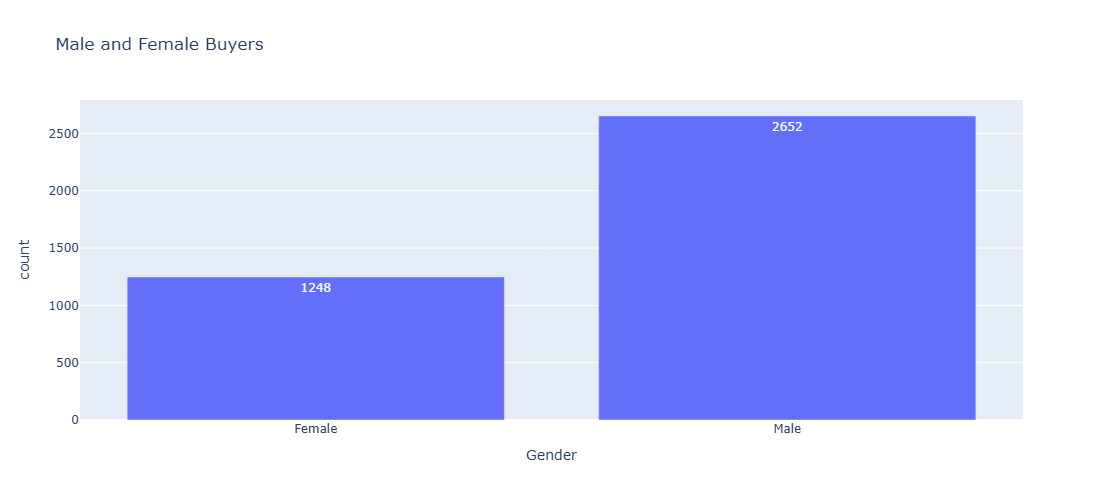

In [9]:
px.bar(vis_gender, x="Gender", y="count",text='count',width=500,height=500,title='Male and Female Buyers')

In [10]:
#Gender wise subscription 
gender_subscription=data.groupby(['Gender'], as_index=False)['Subscription Status'].value_counts()
gender_subscription

Gender Subscription Status  count
0  Female                  No   1248
1    Male                  No   1599
2    Male                 Yes   1053

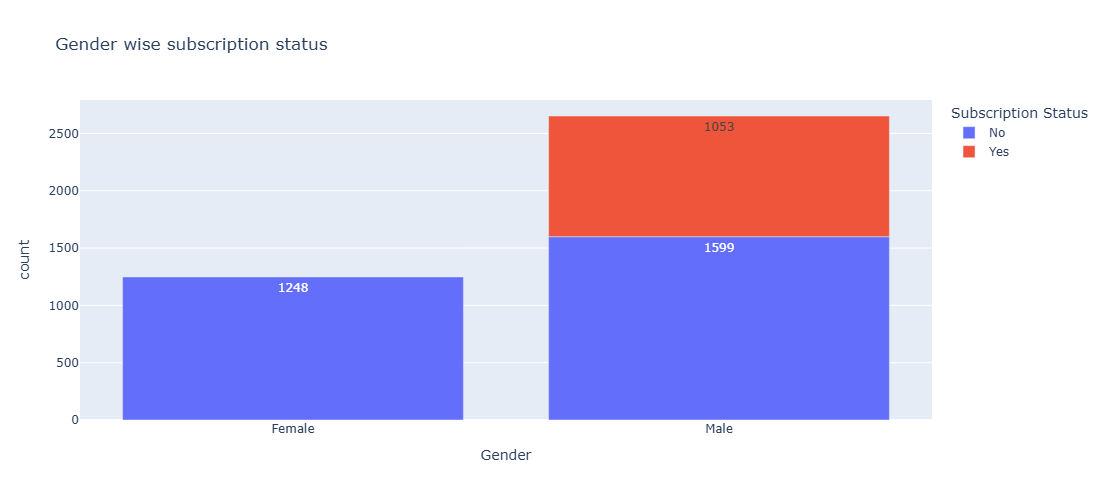

In [11]:
px.bar(gender_subscription, x='Gender', y='count', text='count', color='Subscription Status', title='Gender wise subscription status',width=500,height=500)

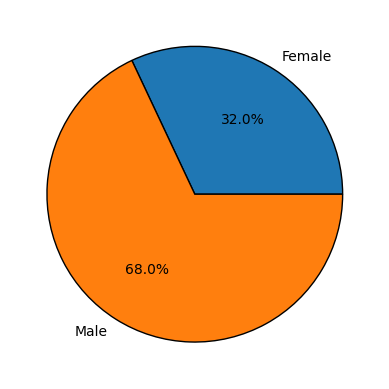

In [12]:
plt.pie(vis_gender['count'], labels="Gender", wedgeprops={'edgecolor': 'Black'},autopct='%1.1f%%',data=vis_gender)
plt.show()

Two Grphs shows that the most buyers are male 

In [13]:
gender_wise_purchase=data.groupby(['Gender'],as_index=False)['Purchase Amount (USD)'].sum()
gender_wise_purchase

Gender  Purchase Amount (USD)
0  Female                  75191
1    Male                 157890

In [14]:
age_fact=data.groupby(['Age'],as_index=False)['Age'].value_counts()
#age_fact

In [15]:
age_visual=data.groupby(['Age'],as_index=False)['Purchase Amount (USD)'].sum()
#age_visual

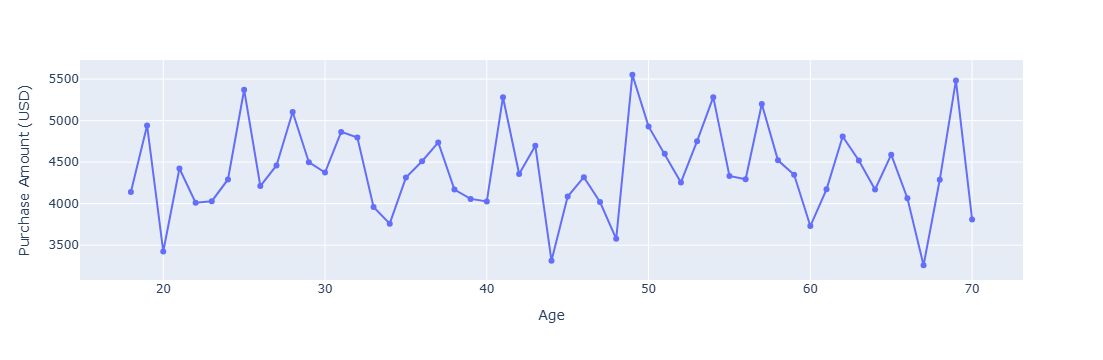

In [16]:
px.line(age_visual, x="Age", y="Purchase Amount (USD)",markers=True)

<Axes: xlabel='Age', ylabel='Count'>

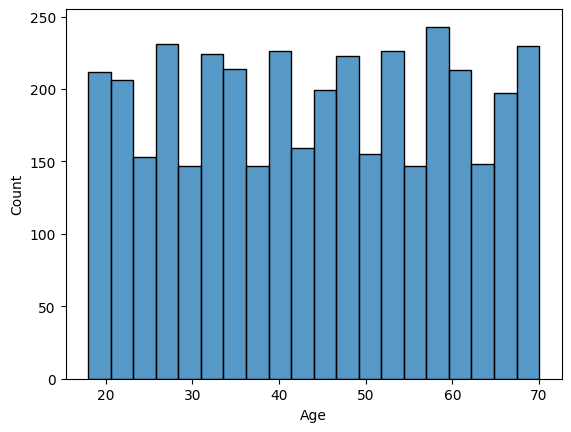

In [17]:
sns.histplot(data, x='Age',bins=20)

In [18]:
#Case:Category Wise total Purchase made 

In [19]:
data['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [20]:
By_category=data.groupby(['Category'])["Purchase Amount (USD)"].sum().reset_index()
#By_category

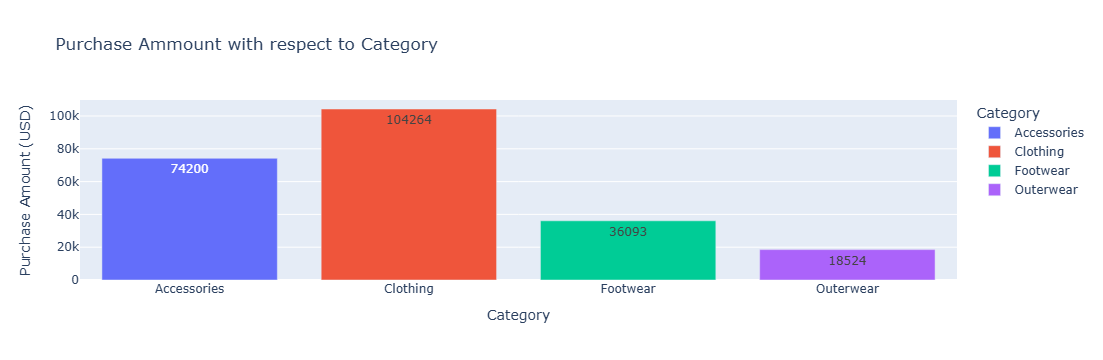

In [21]:
px.bar(By_category, x="Category", y="Purchase Amount (USD)",color='Category',text='Purchase Amount (USD)',title="Purchase Ammount with respect to Category")


<!-- #Category Wise Product Details of company  -->

In [22]:
total_category=data.groupby(['Category'], as_index=False)['Category'].value_counts()
#total_category

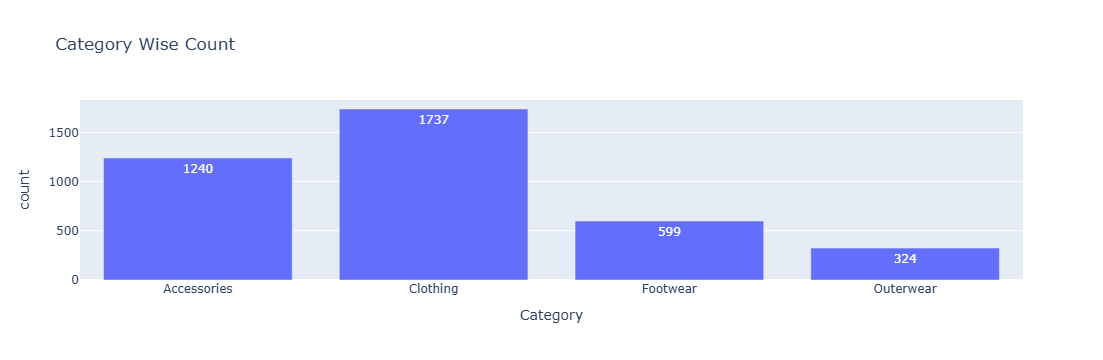

In [23]:
px.bar(total_category, x="Category", y="count",text='count',title="Category Wise Count")

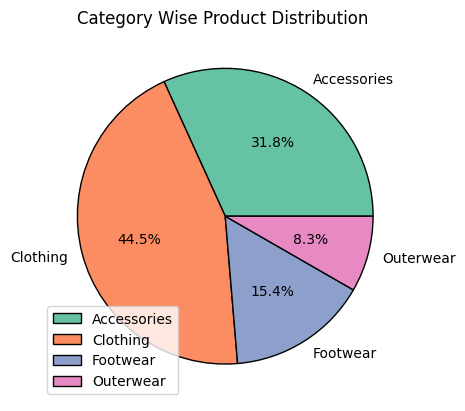

In [24]:
plt.pie(total_category['count'], labels="Category", wedgeprops={'edgecolor': 'Black'},
        autopct='%1.1f%%',colors=sns.color_palette("Set2"),data=total_category)
plt.legend(labels= total_category['Category'], loc="best")
plt.title("Category Wise Product Distribution ")
plt.show()

In [25]:
category_by_size=data.groupby(['Category','Size'], as_index=False)['Size'].value_counts()
#category_by_size

<!-- #Case :-category wise size popularity  -->

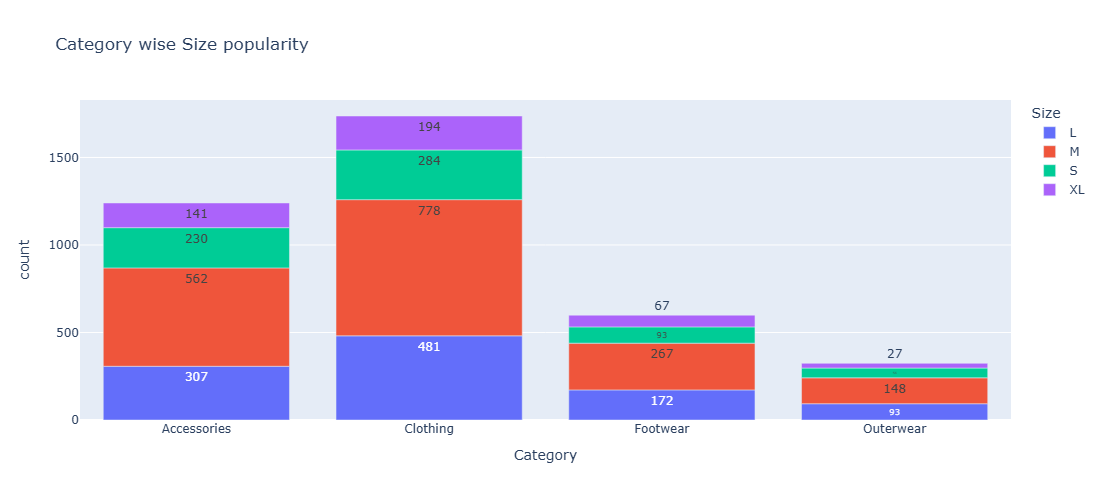

In [26]:
px.bar(category_by_size, x='Category', y='count', text='count',color='Size', title="Category wise Size popularity",width=500,height=500)

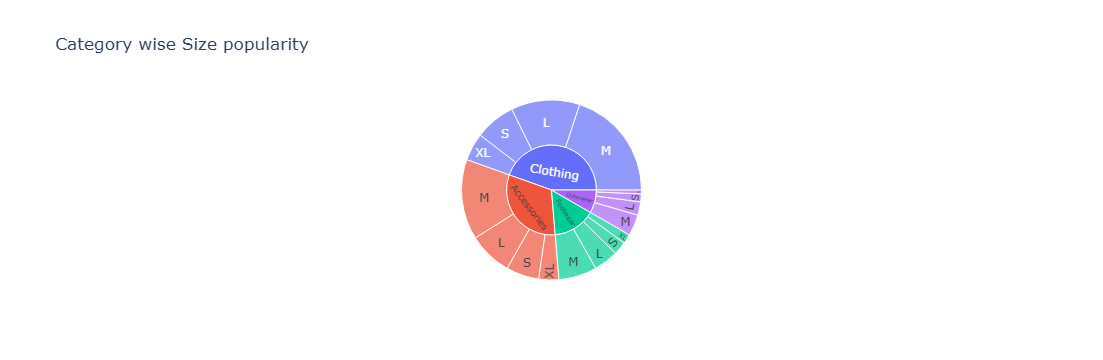

In [27]:
px.sunburst(category_by_size, path=['Category','Size'], values='count', title='Category wise Size popularity')

<!-- #The above graphs shows that the category wise selction of size=[Clothing category shows that most buyed is Medium sized articels and the least is XL]
                                                                   [Accessories category shows that most buyed is Medium sized articels and least is XL]
                                                                   [Footwear category depicts that most buyed is Medium sized article and least is Xl]
                                                                   [outwear category depicts that most buyed is Medium article and least is Xl]

#The most bought category is Clothing and the least is Outwear  -->

#The visualization of Items buyed most

In [28]:
item_buyed=data.groupby(['Item Purchased'], as_index=False)['Item Purchased'].value_counts()

In [29]:
#item_buyed

In [30]:
item_buyed_sort=item_buyed.sort_values(by='count', ascending=True) 

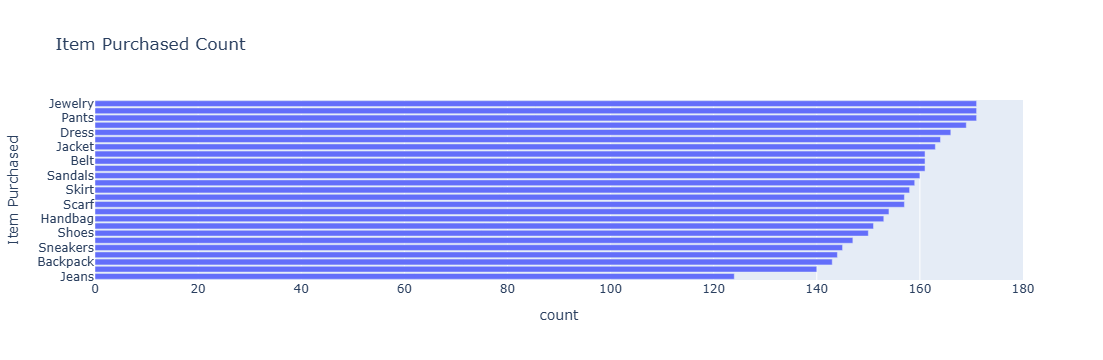

In [31]:
px.bar(item_buyed_sort, x='count', y='Item Purchased', orientation='h', title="Item Purchased Count")

In [32]:
item_purchased_by_category=data.groupby(['Category','Item Purchased'], as_index=False)['Purchase Amount (USD)'].sum()
#item_purchased_by_category

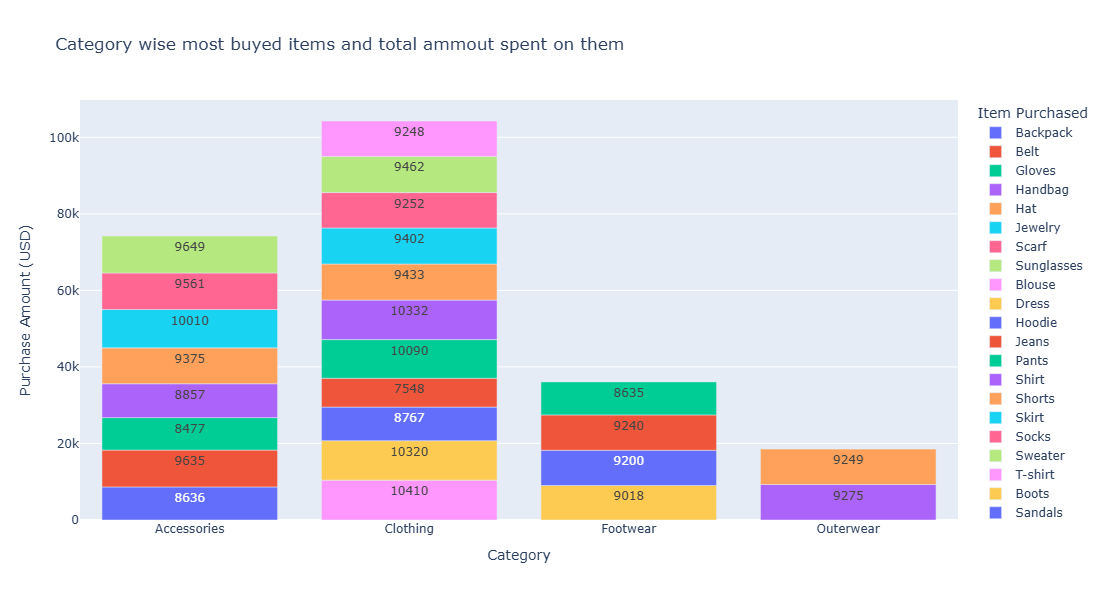

In [33]:
px.bar(item_purchased_by_category, x='Category', y='Purchase Amount (USD)', color='Item Purchased', width=600,height=600,text='Purchase Amount (USD)',title='Category wise most buyed items and total ammout spent on them')

<!-- Conclusion of the above Two graphs shows that :
->The most purchased item is Jwellery,Pants and Blouse with purchase quantity of 171
->The most ammount is spent on Clothing Category which is 104.264K USD and the most buyed item in clothing section is Blouse with total 10.41K USD -->

<!-- Location wise Visualization  -->

In [34]:
vis_location=data.groupby(['Location'], as_index=False)['Location'].value_counts()
vis_location_sort=vis_location.sort_values(by='count', ascending=False).head(10)
#vis_location_sort

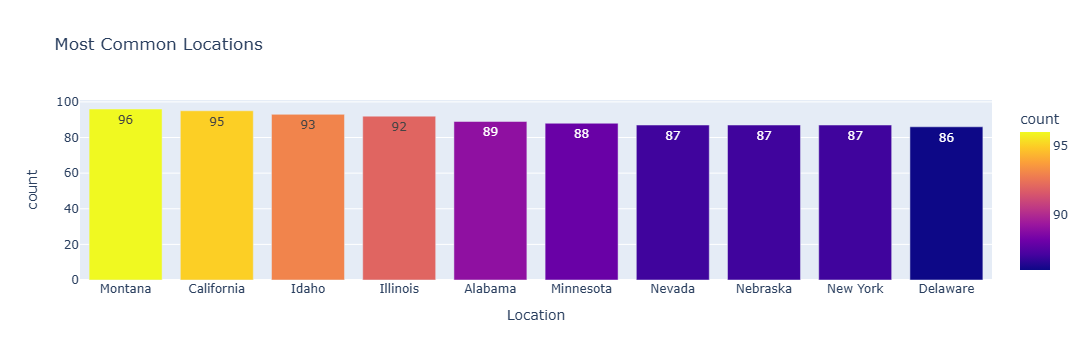

In [35]:
px.bar(vis_location_sort, x='Location', y='count',color='count',text='count',title="Most Common Locations")

In [36]:
location_wise_gender=data.groupby(['Location','Gender'], as_index=False)['Gender'].value_counts()
#location_wise_gender

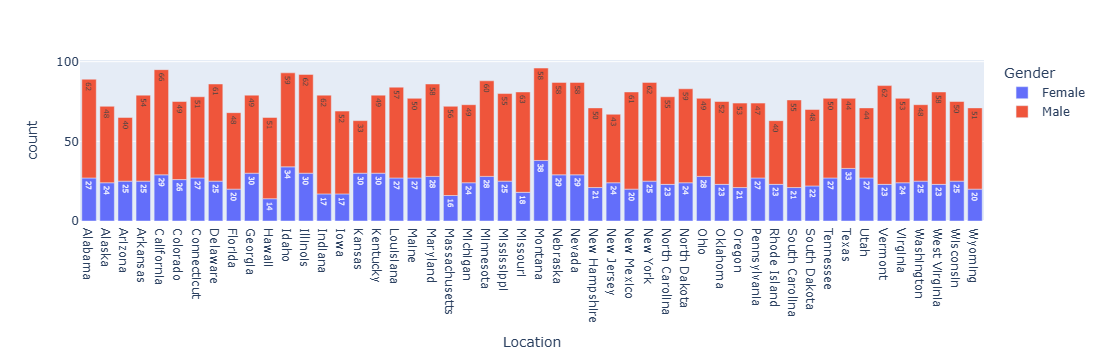

In [37]:
px.bar(location_wise_gender, x='Location', y='count', color='Gender',text="count")

In [38]:
location_wise_purchase=data.groupby(['Location'], as_index=False)['Purchase Amount (USD)'].sum()
#location_wise_purchase

In [39]:
location_wise_purchase_sort=location_wise_purchase.sort_values(by='Purchase Amount (USD)', ascending=False)
#location_wise_purchase_sort

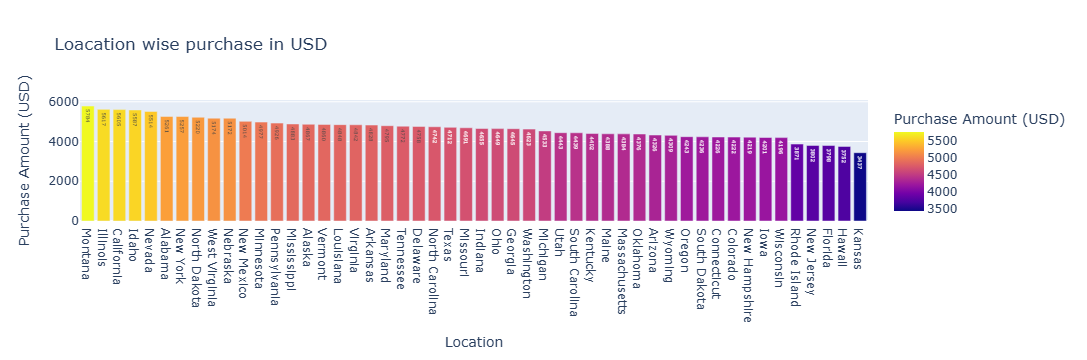

In [40]:
px.bar(location_wise_purchase_sort, x='Location', y='Purchase Amount (USD)',color='Purchase Amount (USD)',text='Purchase Amount (USD)',title='Loacation wise purchase in USD')

<!-- visualization of most popular season  -->

In [41]:
vis_season=data.groupby(data['Season'], as_index=False)['Season'].value_counts()
#vis_season

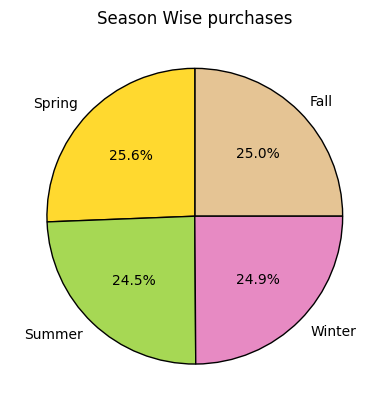

In [42]:
plt.pie(vis_season['count'], labels=vis_season['Season'], wedgeprops={"edgecolor": "Black"},autopct='%1.1f%%', colors=sns.color_palette("Set2_r"),data=vis_season)
plt.title("Season Wise purchases")
plt.show()

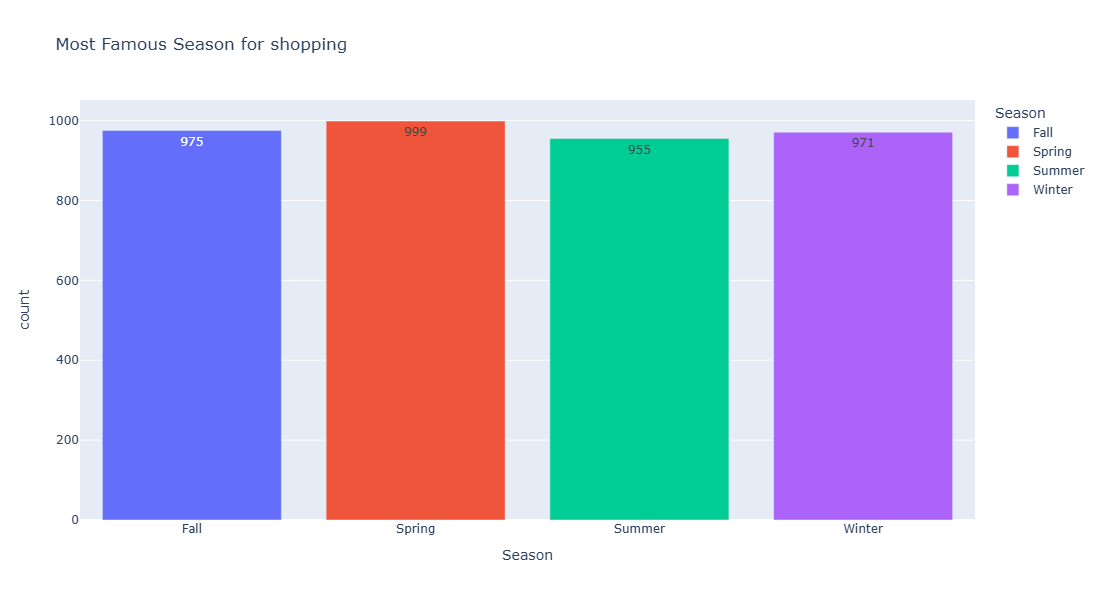

In [43]:
px.bar(vis_season, x='Season', y='count', text="count",title="Most Famous Season for shopping",color='Season',width=1000,
    height=600)   

<!-- visualization of Most Famous items buyed during season  -->

In [44]:
item_wise_season=data.groupby(['Season','Item Purchased'],as_index=False)['Item Purchased'].value_counts()

In [45]:
#item_wise_season

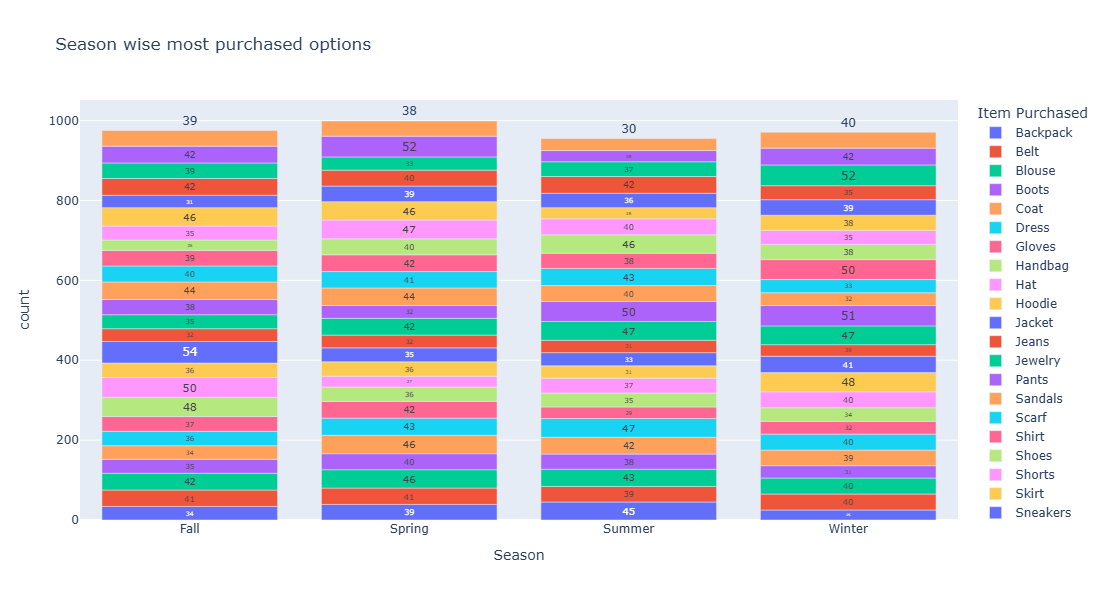

In [46]:
px.bar(item_wise_season, x='Season', y='count', color='Item Purchased',text="count",title="Season wise most purchased options",width=600,height=600)

In [47]:
purchase_item_season=data.groupby(['Season','Item Purchased'],as_index=False)['Purchase Amount (USD)'].sum()
#purchase_item_season

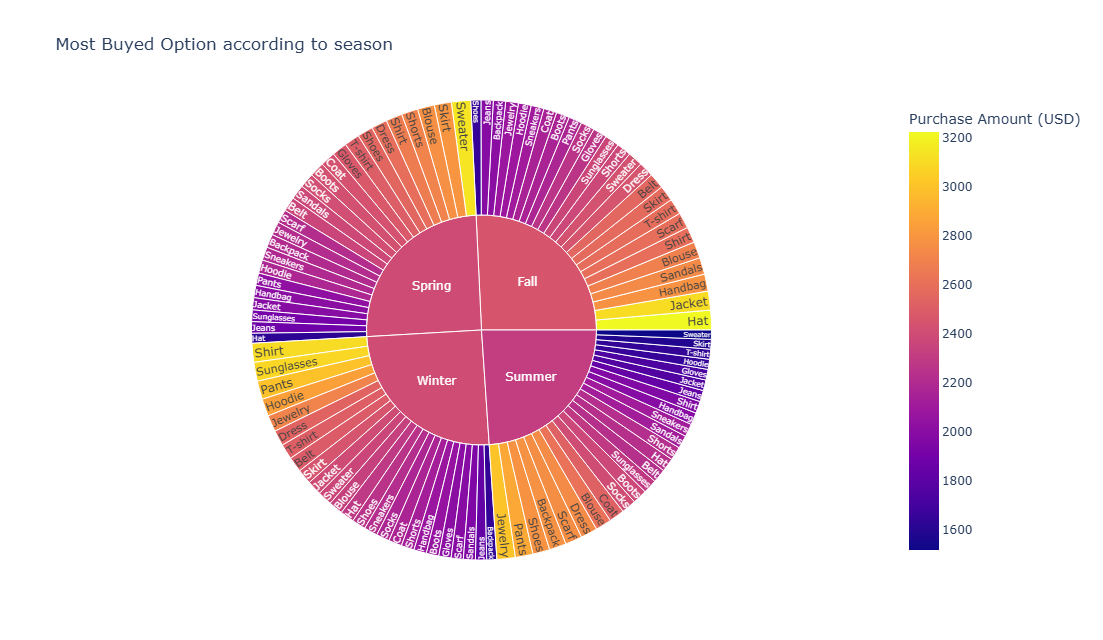

In [48]:
px.sunburst(purchase_item_season, path=['Season','Item Purchased'], values='Purchase Amount (USD)', color='Purchase Amount (USD)',width=875,height=640,title="Most Buyed Option according to season")

In [49]:
season_wise_ammount=data.groupby(['Season'], as_index=False)['Purchase Amount (USD)'].sum()
#season_wise_ammount

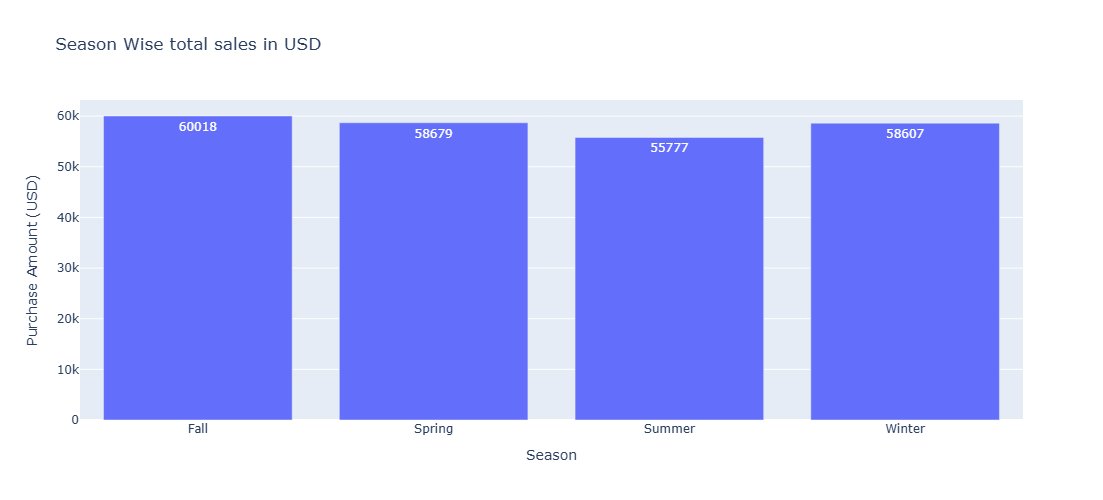

In [50]:
px.bar(season_wise_ammount, x='Season', y='Purchase Amount (USD)',width=600,height=500, text='Purchase Amount (USD)',title='Season Wise total sales in USD')

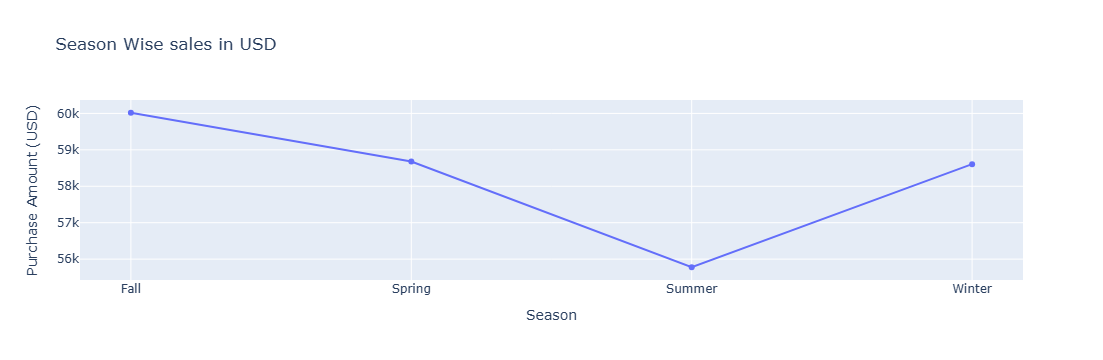

In [51]:
px.line(season_wise_ammount, x='Season', y='Purchase Amount (USD)',markers=True, title='Season Wise sales in USD')

In [52]:
most_used_payment_option=data.groupby(['Payment Method'], as_index=False)['Payment Method'].value_counts()

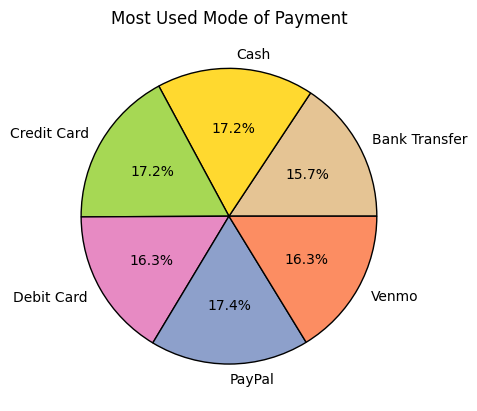

In [53]:
plt.pie(most_used_payment_option['count'], labels=most_used_payment_option['Payment Method'],wedgeprops={"edgecolor": "Black"},autopct='%1.1f%%', colors=sns.color_palette("Set2_r"),data=most_used_payment_option)
plt.title("Most Used Mode of Payment")
plt.show()

In [54]:
purchase_made_by_payment_method=data.groupby(['Payment Method'], as_index=False)['Purchase Amount (USD)'].sum()

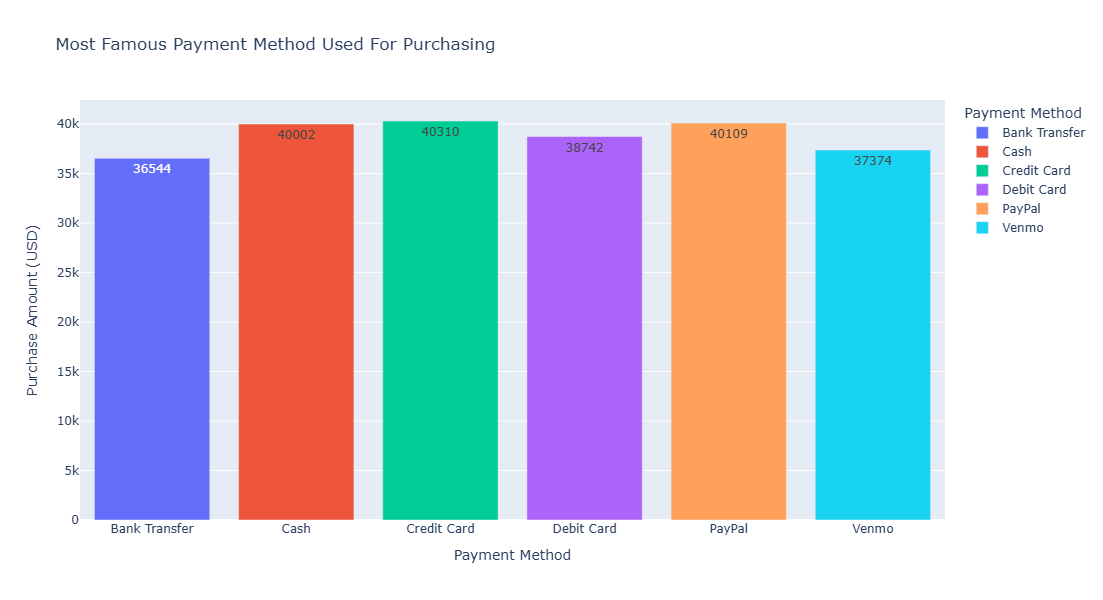

In [55]:
px.bar(purchase_made_by_payment_method, x='Payment Method', y='Purchase Amount (USD)', color='Payment Method',width=600,height=600,
       text='Purchase Amount (USD)' ,title="Most Famous Payment Method Used For Purchasing")



In [56]:
#AGE WISE RATING 
age_wise_rating=data.groupby(['Age','Review Rating'],as_index=False)['Age'].value_counts()
#age_wise_rating

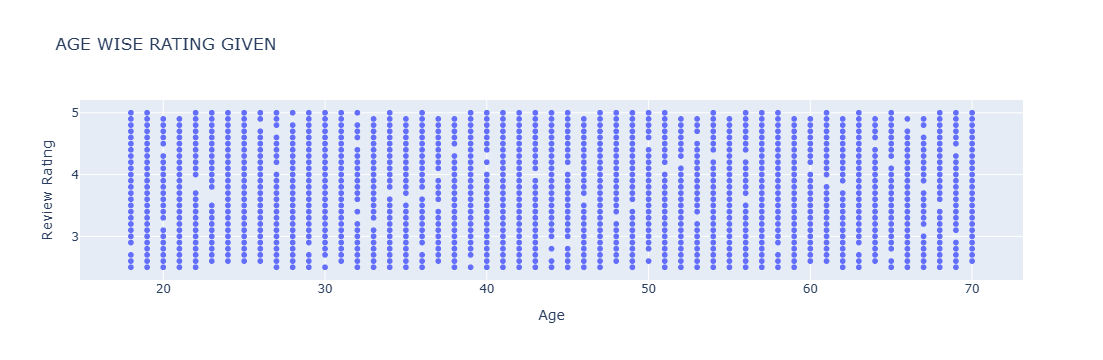

In [57]:
px.scatter(age_wise_rating, x='Age' , y='Review Rating',title="AGE WISE RATING GIVEN")

In [58]:
age_wise_rating_avg=data.groupby(['Age'],as_index=False)['Review Rating'].mean()
#age_wise_rating_avg

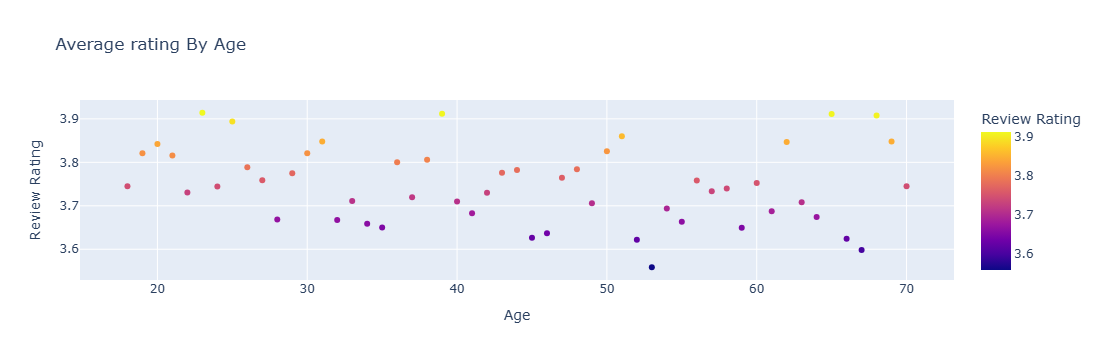

In [59]:
px.scatter(age_wise_rating_avg, x='Age' , y='Review Rating',color='Review Rating',title=" Average rating By Age ")

In [60]:
category_wise_rating=data.groupby(['Category'],as_index=False)['Review Rating'].mean()
#category_wise_rating

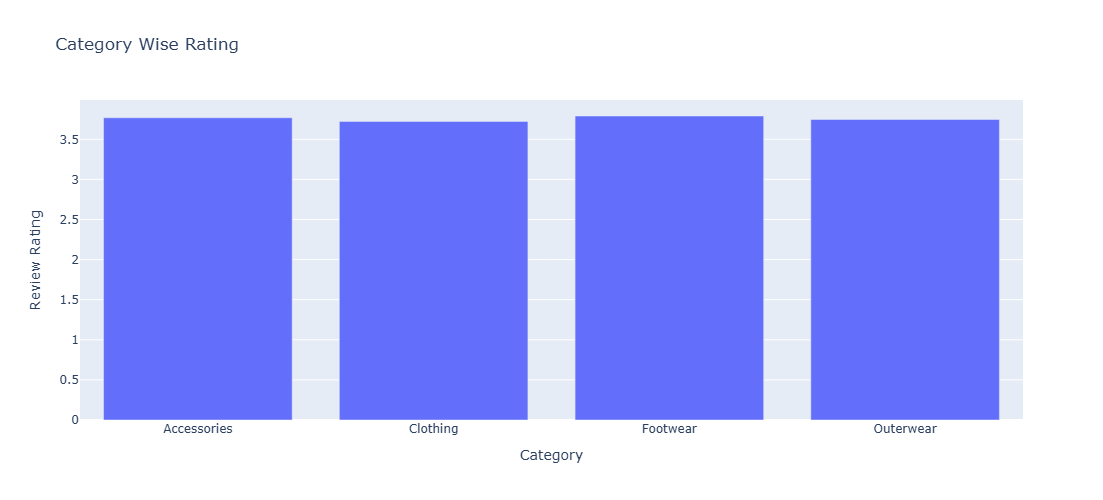

In [61]:
px.bar(category_wise_rating, x='Category', y='Review Rating', title='Category Wise Rating',height=500,width=500)

In [62]:
#Frequency Of Purchase
purchase_frequency=data.groupby(['Frequency of Purchases'],as_index=False)['Frequency of Purchases'].value_counts()
#purchase_frequency

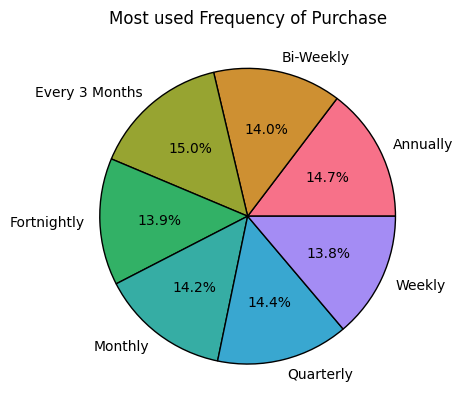

In [63]:
plt.pie(purchase_frequency['count'],labels=purchase_frequency['Frequency of Purchases'],
        wedgeprops={"edgecolor": "Black"},autopct='%1.1f%%', colors=sns.color_palette("husl", 8),data=purchase_frequency)
plt.title("Most used Frequency of Purchase")
plt.show()

In [64]:
#Purchase ammount wise by purchase frequency
purchase_wise_frequency=data.groupby(['Frequency of Purchases'],as_index=False)['Purchase Amount (USD)'].sum()
#purchase_wise_frequency

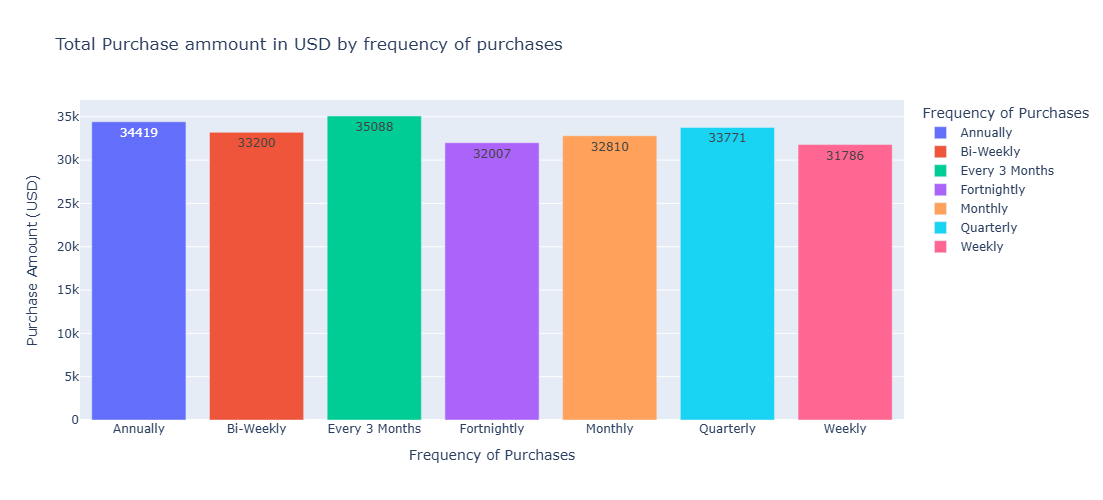

In [65]:
px.bar(purchase_wise_frequency, x='Frequency of Purchases', y='Purchase Amount (USD)',text='Purchase Amount (USD)',color='Frequency of Purchases',width=500,height=500,title="Total Purchase ammount in USD by frequency of purchases")

<!-- The above dataset shows the conclusive evidences of visulas of sales according to various attributes -->